# Linear Regression

Mean Square Error (MSE) for a Linear Regression Model is $$MSE(X, h_\theta) = \frac{1}{m} \sum_{i = 1}^{m}{(\theta^T \cdot x^{(i)} - y^{(i)})}$$

The normal equation to find $\hat{\theta}$ by which the cost function is minimized is as follows: $$\hat{\theta} = (X^T\cdot{}X)^{-1} \cdot X^T \cdot y$$
Lets generate some linear-looking data to test this equation on.

Text(0,0.5,'$y$')

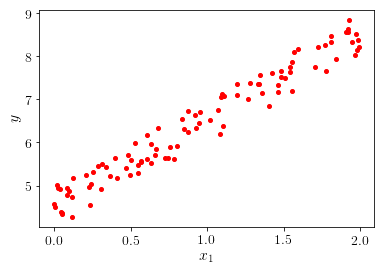

In [32]:
from __future__ import division, print_function, unicode_literals


import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
rc('text', usetex = True)
rc('font', family='serif')

X = 2 * np.random.rand (100, 1)
y = 4 + 2 * X + np.random.rand (100, 1) #np.random.rand (100, 1) is Guassian noise

plt.plot(X, y, 'r.', markersize=8)
plt.xlabel('$x_1$')
plt.ylabel('$y$')

In [33]:
X_b = np.c_[np.ones((100,1)), X] # add x_0 for each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.57499626],
       [1.98755598]])

In this way, we trained our model. Now, we can make prediction using $\hat\theta$.

In [34]:
X_new_b = np.c_[[[1], [1]], [[0], [2]]]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.57499626],
       [8.55010821]])

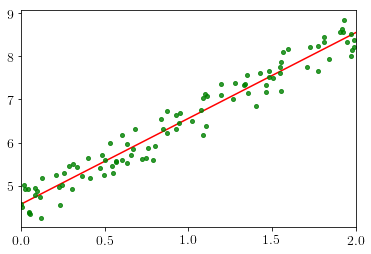

In [35]:
plt.plot([[0], [2]], y_predict, 'r-')
plt.plot(X, y, 'g.', markersize=8, alpha=0.8)
plt.margins(x = 0)
plt.show()

This is the equivalent code using __Scikit-Learn__.

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.57499626]), array([[1.98755598]]))

In [38]:
lin_reg.predict([[0], [2]])

array([[4.57499626],
       [8.55010821]])

# Computational Time for Linear Regression

The inverse matrix computation is costly and is $O(n^{2.4})$ to $O(n^3)$ depending on the implementation. Here, $n$ is the number of features. However, it is linear with regard to the number of instances. 

![Gradient Descent](images\\GD.png)

Fortunately, the MSE cost function for a Linear Regression model happens to be a _convex function_, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, but just one global minimum.

Since we are considering different features in __GD__, we need to make sure that all features are in the same scale. We could use __StandardScaler__ class of Scikit-Learn.